### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

### Loading Dataset 

In [2]:
data = pd.read_csv('titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data = pd.read_csv('titanic_dataset.csv',index_col='PassengerId')
#MAking the PassengerId as the Index Column

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Preprocessing 

In [8]:
# Drop columns not useful for our analysis
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

#### Missing Values 

In [9]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
# Fill missing values in age column with median
data['Age'].fillna(data['Age'].median(), inplace=True)

In [11]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

#### One Hot Encoding  

In [12]:
# Convert categorical columns to numerical
data = pd.get_dummies(data, columns=['Sex', 'Embarked'])

In [13]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


#### Outlier 

Text(0.5, 1.0, 'Boxplot Of Age Columns')

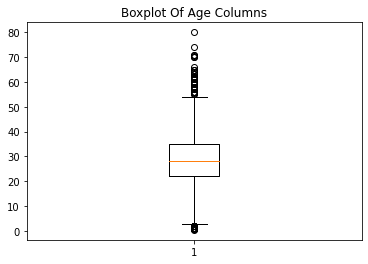

In [14]:
plt.boxplot(data['Age'])
plt.title('Boxplot Of Age Columns')

Text(0.5, 1.0, 'Boxplot Of Fare Columns')

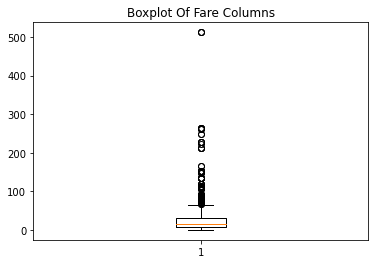

In [15]:
plt.boxplot(data['Fare'])
plt.title('Boxplot Of Fare Columns')

In [16]:
num_feat =data[['Age','Fare']]

In [17]:
for i in num_feat:
    Q1=np.percentile(data[i],25,interpolation='midpoint')
    Q2=np.percentile(data[i],50,interpolation='midpoint')
    Q3=np.percentile(data[i],75,interpolation='midpoint')

In [18]:
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [19]:
data[i].median()

14.4542

In [20]:
IQR=Q3-Q1

In [21]:
print(IQR)

23.0896


In [22]:
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [23]:
outlier=[]
for x in data[i]:
    if((x>up_limit)or(x<low_limit)):
        outlier.append(x)

In [24]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [25]:
index_out = data[(data[i]>up_limit)|(data[i]<low_limit)].index

In [26]:
data.drop(index_out,inplace=True)

In [27]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1
6,0,3,28.0,0,0,8.4583,0,1,0,1,0


#### MinMaxScaling 

In [28]:
X = pd.DataFrame(data,columns=['Age','Fare'])

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
minmax = MinMaxScaler(feature_range=(0,1))

In [31]:
X1= minmax.fit_transform(X)

In [32]:
X1=pd.DataFrame(X1,columns=['Age','Fare'])

In [33]:
X1.describe()

,Age,Fare
count,775.000000,775.000000
mean,0.355978,0.274186
std,0.160620,0.208894
min,0.000000,0.000000
25%,0.271174,0.121474
50%,0.346569,0.200000
75%,0.421965,0.400000
max,1.000000,1.000000


In [34]:
X1.head()

,Age,Fare
0,0.271174,0.111538
1,0.321438,0.121923
2,0.434531,0.816923
3,0.434531,0.123846
4,0.346569,0.130128


### Splitting 

In [35]:
# Split data into features and target
X = data.drop(['Survived'], axis=1)
y = data['Survived']

### KNN 

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier()

### SVM 

In [38]:
from sklearn.svm import SVC

In [39]:
svm=SVC()

### KFold Cross Validation 

In [40]:
from sklearn.model_selection import KFold,cross_val_score

In [41]:
k_fold = KFold(n_splits=10, random_state=42,shuffle=True)
k_fold_accuracies = cross_val_score(knn, X, y, cv=k_fold)
k_fold_accuracies_svm = cross_val_score(svm, X, y, cv=k_fold)
print("K-Fold Cross Validation Accuracy KNN: ", k_fold_accuracies.mean())
print("K-Fold Cross Validation Accuracy SVM: ", k_fold_accuracies_svm.mean())

K-Fold Cross Validation Accuracy KNN:  0.7290043290043291
K-Fold Cross Validation Accuracy SVM:  0.7071262071262072


### StratifiedKFold Cross Validation 

In [42]:
from sklearn.model_selection import StratifiedKFold

In [43]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=0,shuffle=True)
strat_k_fold_accuracies = cross_val_score(knn, X, y, cv=strat_k_fold)
strat_k_fold_accuracies_svm = cross_val_score(svm, X, y, cv=strat_k_fold)
print("Stratified K-Fold Cross Validation Accuracy KNN: ", strat_k_fold_accuracies.mean())
print("Stratified K-Fold Cross Validation Accuracy SVM: ", strat_k_fold_accuracies_svm.mean())

Stratified K-Fold Cross Validation Accuracy KNN:  0.7240093240093242
Stratified K-Fold Cross Validation Accuracy SVM:  0.7032967032967032
